<a href="https://colab.research.google.com/github/csoham96/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Importing the Librarires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
!pip install pycountry -q 

     |████████████████████████████████| 10.1 MB 28.2 MB/s 


### Mounting google drive where the data is present

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the data into DataFrame

In [3]:
hotel_df=pd.read_csv('/content/drive/MyDrive/EDA capstone project/Hotel Bookings.csv')

In [4]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
#See the descriptive statistics of Dataframe
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### Checking the first few data in the dataset

In [6]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
#Checking the shape of the data
hotel_df.shape

(119390, 32)

In [8]:
#cheking the null values in the data
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Our dataset has 119390 rows and 32 columns

By checking the info and null values we see that most of the columns are non null with exception of company which has large Null values(112593) and some columns like country,company,agent,children with few missing data

# Dealing with Missing Values

In [9]:
#Viewing the company column and various unique occurences
hotel_df['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64

In [10]:
#Viewing the agent column and various unique occurences
hotel_df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [11]:
#Viewing the country column and various unique occurences
hotel_df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

We see that the maximum bookings are from the country PRT we can fill this with missing values

In [12]:
#Viewing the median and mean of the children
hotel_df['children'].median(),hotel_df['children'].mean()

(0.0, 0.10388990333874994)

Now we can fill the missing values with some values

For agent column we can fill the value with the median of value

In [13]:
# Filling agent with median value
hotel_df['agent'].fillna(hotel_df['agent'].median(),inplace=True)

For filling the children column we can replace it with median value

In [14]:
#Filling children with median data
hotel_df['children'].fillna(hotel_df['children'].median(),inplace=True)

For filling the countries column we can use the most occuring data and fill the null values by those 

In [15]:
#Filling country column with mode data
hotel_df['country'].fillna(hotel_df['country'].mode().to_string(),inplace=True)

For filling the company data we choose to fill it with 0 as it contains data in numerical form


In [16]:
#Filling company column with 0.0
hotel_df['company'].fillna(0.0,inplace=True)

In [17]:
# checking for null value again in the data
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

As we can see we have successfully imputed data with data and replaced all the NAN values

There many data where there are zero guests and they need to be removed from the table as they present no value in our analysis

In [18]:
hotel_df[hotel_df.children+hotel_df.adults+hotel_df.babies==0].shape

(180, 32)

As we can see that dataframe has around 180 datapoints where there are 0 guests so we can drop those rows containing 0 guests

In [19]:
#Dropping the data with 0 guests
hotel_df.drop(hotel_df[(hotel_df.adults+hotel_df.babies+hotel_df.children)==0].index,inplace=True)

## Converting Data Types

In [20]:
#Checking the datatypes
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

As we can see that some columns such as children, company, and agent are of float data type but contains Integer Values.We can convert them to int

In [21]:
#Converting float data types of integer like values to Int64 type
hotel_df[['children', 'company', 'agent']]=hotel_df[['children', 'company', 'agent']].astype('int64')

# Exploratory Data Analysis 

## Plotting Hotel Types

Checking the the hotel column for different types of Hotel

In [22]:
# Checking the Hotel columns for different values
hotel_df['hotel'].value_counts()

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

There are basically two types of hotel and that is City Hotel and Resort Hotel

Text(0, 0.5, 'Number of Hotels')

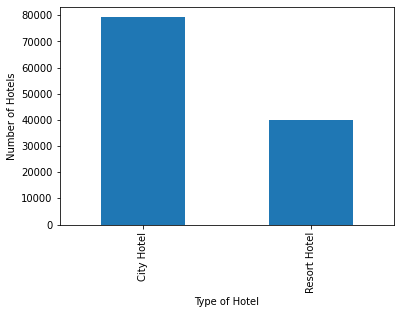

In [23]:
#Visualizing the types of Hotel using graph
hotel_df['hotel'].value_counts().plot(kind='bar')
plt.xlabel('Type of Hotel')
plt.ylabel('Number of Hotels')

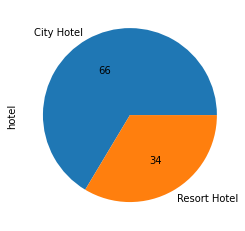

In [24]:
#Plotting the Pie chart of the types of hotel in the Dataset
hotel_df['hotel'].value_counts().plot(kind='pie',autopct='%.0f')

As we can see using two types of graph that 66% of Hotels are City Hotel and 34 % of hotels are Resort Hotel

## Plotting the Booking status

In [25]:
#Checking the is_canceled column
hotel_df['is_canceled'].value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

Visualizing the Data of number of Booking that are cancelled

Text(0, 0.5, 'Number of Bookings')

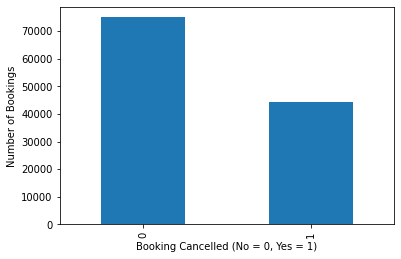

In [26]:
#plotting the booking status yes or no
hotel_df['is_canceled'].value_counts().plot(kind='bar')
plt.xlabel('Booking Cancelled (No = 0, Yes = 1)')#Setting the X-label
plt.ylabel('Number of Bookings')#Setting the Y-label

In [27]:
# Plotting Pie chart for Booking status
fig=px.pie(hotel_df,names='is_canceled',width=400,height=300,title='Booking Cancelled (No = 0, Yes = 1)')
fig.show()

As we can see 63 % bookings are done and around 37% bookings get cancelled

## Plotting box plot for lead_time

Lead time is time of duration of stay of each customer

In [28]:
# Plotting the box plot for lead time to see the distribution of data
fig = px.box(hotel_df, y="lead_time",width=600, height=600)
fig.show()

As we can see from the box plot that min time of stay is 0 median is 69
and most of the stay time is in between 18 to 161 but there are also many data points which lie above 161 with max stay of upto 737

# Plotting the data for arrival date year

In [29]:
#Viewing the arrival date year 
hotel_df['arrival_date_year'].value_counts()

2016    56623
2017    40620
2015    21967
Name: arrival_date_year, dtype: int64

In [30]:
#Plotting the arrival date year
px.histogram(hotel_df, x="arrival_date_year", color="hotel",barmode='group',width=600, height=400)

In [31]:
# looking at the bar graph in different years
fig=px.bar(hotel_df['arrival_date_year'].value_counts(),width=600, height=400,title='Barchart for Year wise booking')
fig.update_layout(xaxis_title='Year',yaxis_title='Number of Bookings')
fig.show()

Text(0.5, 1.0, 'Pie chart for Year wise booking')

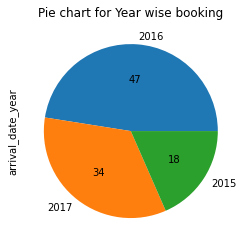

In [32]:
#Plotting Pie chart for the arrival date year to figure out the percentage
hotel_df['arrival_date_year'].value_counts().plot(kind='pie',autopct='%.0f')
plt.title('Pie chart for Year wise booking')

As we can see from the Pie chart that 47% of the total bookings were fron 2016 and subsequently 34% in 2017 and 18% in 2015. There is positive trend from 2015-2016 and then a negative trend from 2016-2017

# Plot arrival month 

In [33]:
#Viewing the booking across different months
hotel_df['arrival_date_month'].value_counts()

August       13861
July         12644
May          11780
October      11147
April        11078
June         10929
September    10500
March         9768
February      8052
November      6771
December      6759
January       5921
Name: arrival_date_month, dtype: int64

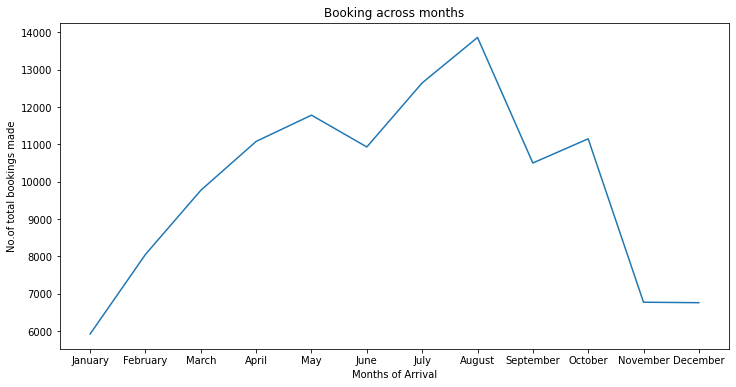

In [34]:
#Visualizing the trend of Booking across different Months

#Keeping the months in an order in a list variable
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

#reording months in order which they appear in a year
Reordered_months=hotel_df['arrival_date_month'].value_counts().reindex(Months)

#Setting the index as x
x=Reordered_months.index 
#Setting the values in y 
y=Reordered_months
# Setting figure size
plt.figure(figsize=(12, 6))
#Plotting the line graph
plt.plot(x,y)
#Setting X label and Y label
plt.xlabel('Months of Arrival')
plt.ylabel('No.of total bookings made')
#Setting the title
plt.title('Booking across months')
plt.show()

As we can see from the trend line most of the bookings occur from may to August and generally fall during the winter months. of November,December and January


Text(0, 0.5, 'No.of total bookings made')

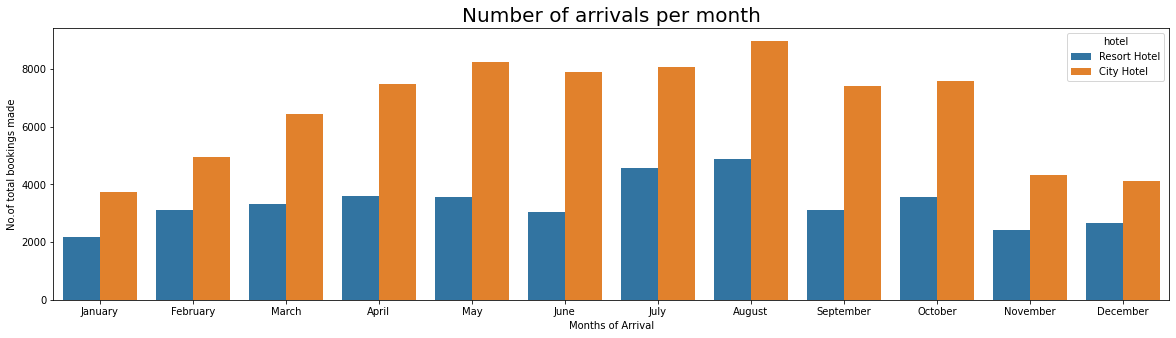

In [35]:
#Plotting Graph arrival month
plt.figure(figsize=(20,5)) # adjust the size of the plot
#Using seaborns countplot to plot bookings for each hotel types across different months
sns.countplot(data = hotel_df, x = 'arrival_date_month', hue = 'hotel', order =Months).set_title('Number of arrivals per month',fontsize=20)
# Creating label for x-axis
plt.xlabel('Months of Arrival') 
plt.ylabel('No.of total bookings made')

We see a similar trend for both Resort and city hotel


#Plotting Graph for number of arrivals per day

Text(0.5, 1.0, 'Number of arrivals per day')

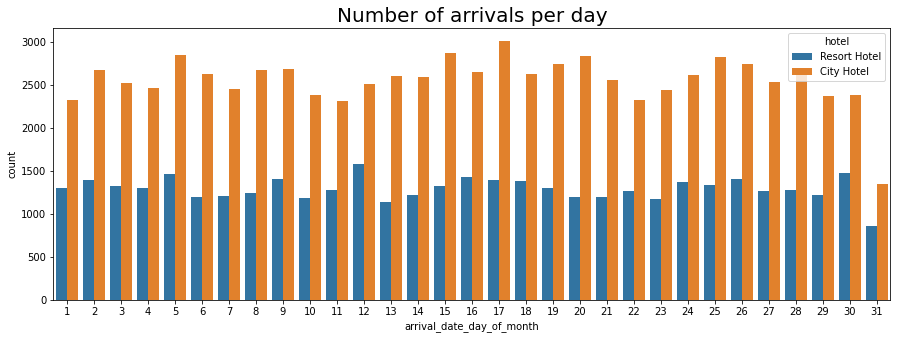

In [36]:
plt.figure(figsize=(15,5))
#Plotting the Daily booking status for each day.
sns.countplot(data =hotel_df, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Number of arrivals per day', fontsize = 20)

As we can see the booking across all dates in a month is fairly same with occasional dips around end of month


# Plot the number of weekend night stays

Text(0.5, 1.0, 'Number of stays on weekend nights')

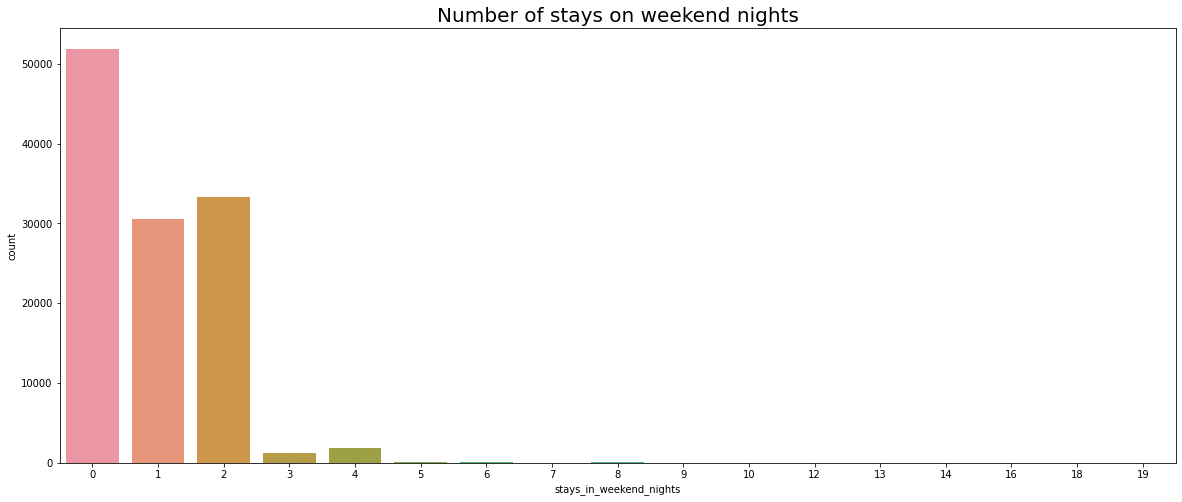

In [37]:
plt.figure(figsize=(20,8))
#count plot to see the stay in weekend nights
sns.countplot(data = hotel_df, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 20)


As we can see that there isnt much of stays more 2

Text(0.5, 1.0, 'Number of adults')

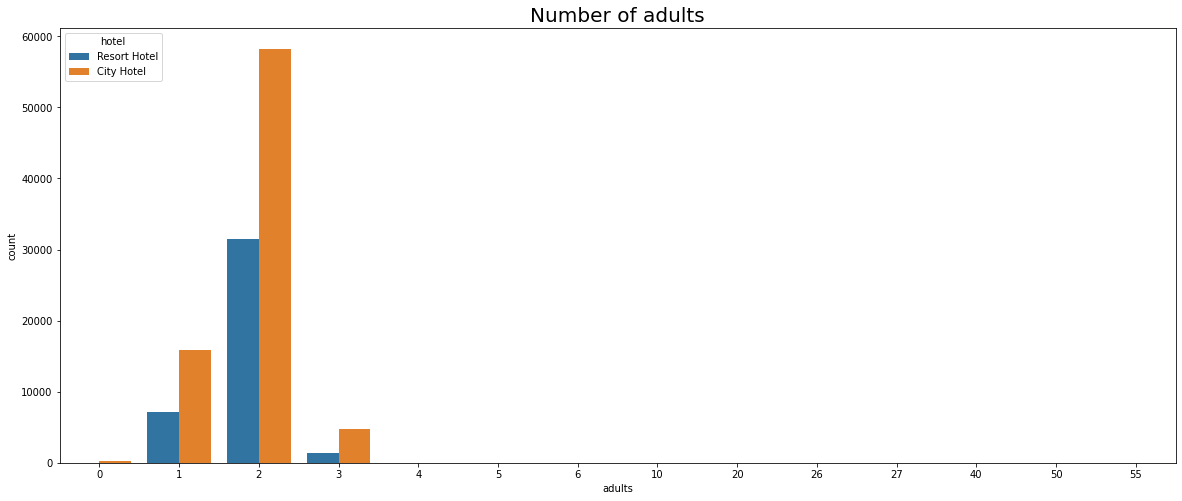

In [38]:
plt.figure(figsize=(20,8))
sns.countplot(data = hotel_df, x = 'adults', hue = 'hotel').set_title("Number of adults", fontsize = 20)

As we can see thatin most cases there are 2 adults with most booking indicating couples are more frequent in hotels

# Plotting Graph for Visualizing the Bookings made on the Basis of Country

In [39]:
#Plotting Graph of Visitors from different Countries
visitors = hotel_df.groupby(['country']).size().reset_index(name = 'count')
#plotting them in world map
px.choropleth(visitors,locations = "country",color= "count", hover_name= "country",color_continuous_scale=px.colors.sequential.Viridis,
                    title="Home country of visitors")

#### Plotting Bar plots for different Top 10 Countries

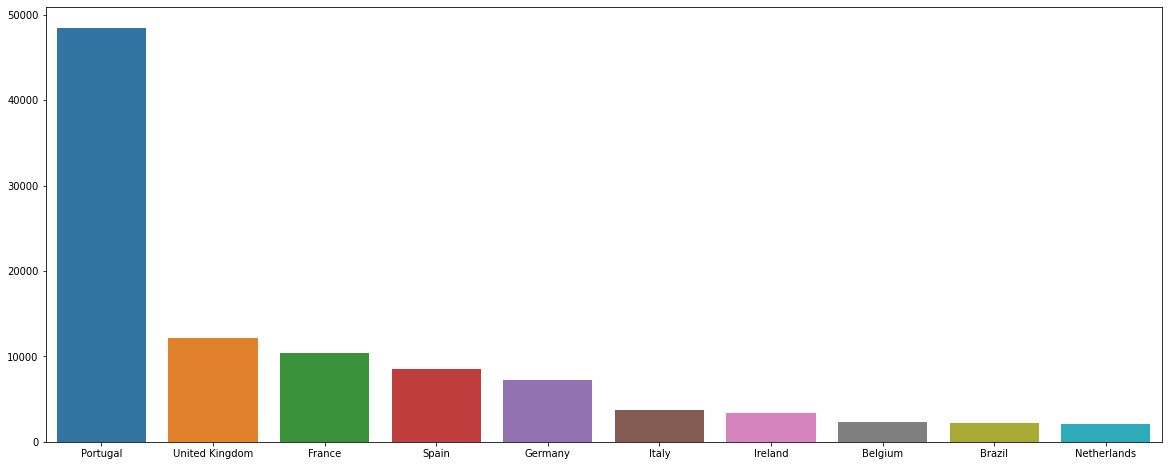

In [40]:
#module which converts the country shortforms to full names
import pycountry as pc
#getting the top 10 countries
x=hotel_df['country'].value_counts().index.values.tolist()[:10]
#Count of all the country bookings comming from
y=hotel_df['country'].value_counts().values[:10]

Name_list=[pc.countries.get(alpha_3=name).name for name in x]
plt.figure(figsize=(20,8))
sns.barplot(Name_list,y)


We see that majority of the bookings are from Portugal followed by Uk ,Franxe Spain. We see that most of the Hotels are of European Origin

# Visualizing the Types of Deposit Made

In [41]:
#Seing the different types of Deposit type
hotel_df['deposit_type'].value_counts()

No Deposit    104461
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

Text(0.5, 1.0, 'Graph showing types of deposits')

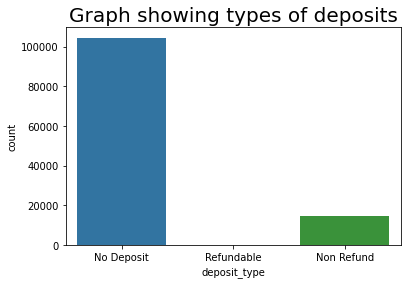

In [42]:
# Plotting to see the Variations
sns.countplot(data = hotel_df, x = 'deposit_type').set_title('Showing types of deposits', fontsize = 20)

This graph shows us that most of the bookings that are happening are No-Deposit type which might indicate the High rate of Cancellation of Bookings

# Ploting graph for Repeated Guest

Text(0.5, 1.0, 'Showing whether guest is repeated guest')

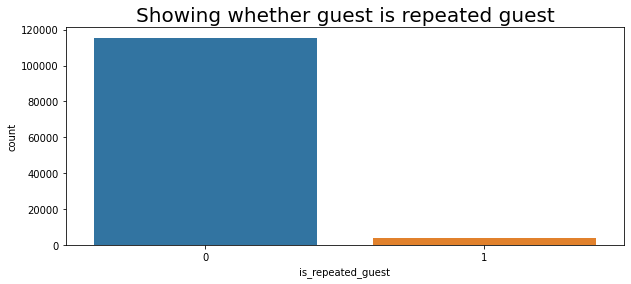

In [43]:
#Plotting graph repeated guests
plt.figure(figsize=(10,4))
sns.countplot(data = hotel_df, x = 'is_repeated_guest').set_title('Showing whether guest is repeated guest', fontsize = 20)

Plotting Pie Graph for repeated guest

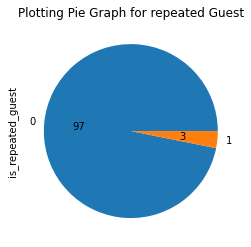

In [44]:
plt.title('Plotting Pie Graph for repeated Guest')
hotel_df['is_repeated_guest'].value_counts().plot(kind ='pie',autopct='%.0f')

As we can see that 97% of Customers are new customers and the only 3 percent 

# 